# Let's explore some data.

## This data set contains COVID-19 patient information pertaining to pre-conditions and hospitlization. Originally from Mexico and in the Spanish language, a translated version of this data has been hosted on [Kaggle](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset).

## For now I am ignoring the formatting of the graphs. Later on I will include a section below for generating print worthy graphs.



In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

### Let's load the data. We will drop the duplicates in the 'ID' column so that each patient has one record.

In [39]:
covid = pd.read_csv('covid.csv')
covid = covid.drop_duplicates('id')
covid.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


### The data provides us with the date of deaths for patients. The value '9999-99-99' seems to represent those who survived.

In [40]:
covid.date_died.value_counts()

9999-99-99    527191
16-06-2020       699
08-06-2020       698
10-06-2020       688
12-06-2020       670
               ...  
11-02-2020         1
29-01-2020         1
13-01-2020         1
08-02-2020         1
12-03-2020         1
Name: date_died, Length: 124, dtype: int64

### In our dataset, for the pre-condition columns, 2 represents NO, and 1 represents YES. Let's replace 2/NO with 0. This will allow us to sum up the '1's' in order to see which pre-condtions were most prevelant.
### 97 98 99 represent Does Not Apply, Ignored, Unspecified. I will treat these as NO
###

In [41]:
cond_list = ['pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco']
for col in cond_list:
    covid[col] = covid[col].replace(2,0)
    covid[col] = covid[col].replace(97,0)
    covid[col] = covid[col].replace(98,0)
    covid[col] = covid[col].replace(99,0)

In [42]:
covid.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,0,...,0,0,0,0,0,0,0,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,0,...,0,0,0,0,0,0,0,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,0,...,0,0,0,0,1,0,0,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,0,...,0,0,0,0,0,0,0,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,0,...,0,1,0,1,0,0,0,99,1,2


In [43]:
covid['pregnancy'].value_counts()

0    559151
1      4050
Name: pregnancy, dtype: int64

### Let's look at the percentage of patients who died

In [44]:
deceased = covid[covid['date_died'] != '9999-99-99']
len(deceased)/len(covid)*100

6.393809670082263

### From a first glance it seems that the death rate in this dataset is about 6.4%
Using the rc parameters "usetex" option for matplotlib will slow down your code. It will take sometime additional time to execute the very first time you run it.

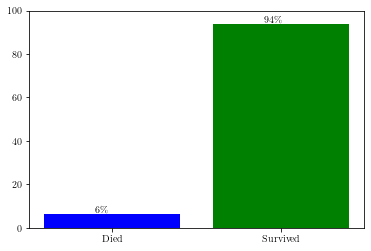

In [45]:
fig, axs0 = plt.subplots()
plt.bar([0,1],[len(deceased)/len(covid)*100, 100-(len(deceased)/len(covid)*100)],
        color=['blue', 'green'])
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

plt.xticks(np.arange(2), ['Died','Survived'])
plt.yticks(np.arange(0,120,20))
for p in axs0.patches:
        a =p.get_height()
        axs0.annotate('{:0.0f}'.format(float(a))+'\%', (p.get_x()+.3, p.get_height() +.3), weight = 'bold')

        #axs[0,0].set_title('Ethnicity',size = 'small', usetex = True)
        #axs[0,0].tick_params(axis='y', which='major', labelsize=8)
plt.show()

### So far we have looked at the entire dataset. This includes people who have not been recognized as having a pre-condition.

In [46]:
pc = covid[(covid['pregnancy'] == 1) | (covid['diabetes'] == 1) | (covid['copd'] == 1) | (covid['asthma'] == 1) |\
    (covid['inmsupr'] == 1) | (covid['hypertension'] == 1) | (covid['other_disease'] == 1) | (covid['cardiovascular'] == 1) |\
    (covid['obesity'] == 1) | (covid['renal_chronic'] == 1) | (covid['tobacco'] == 1)]

pc_deceased = pc[pc['date_died'] != '9999-99-99']

In [47]:
print(len(deceased))
print(len(pc_deceased))
print(len(pc))

36010
26057
240012


### Of those infected, a large portion had pre-existing conditions.

This graph will have all the default formatting, the one above had a few changes.

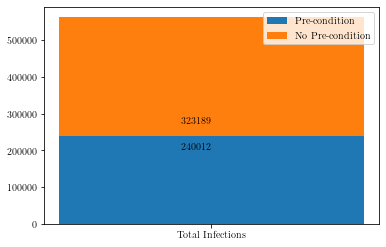

In [57]:
fig, axs1 = plt.subplots()
plt.bar(np.arange(1),len(pc), width= .5)
plt.bar(np.arange(1), len(covid)-len(pc), bottom = len(pc), width = .5)
plt.xticks(np.arange(1), ['Total Infections'])

plt.legend(['Pre-condition','No Pre-condition'])
for p in axs1.patches:
        a =p.get_height()
        axs1.annotate('{:0.0f}'.format(float(a)), (p.get_x()+.2, p.get_height() * .85), weight = 'bold')
plt.show()

### Let's look at the number of patients who died as a result of COVID who had pre-conditions against those who died and did not have a pre-condition

No handles with labels found to put in legend.


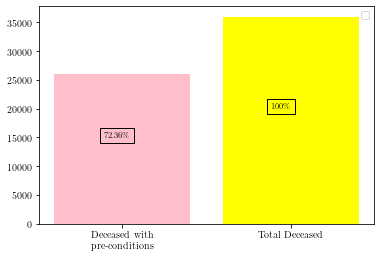

0.7236045542904749

In [83]:
fig, axs3 = plt.subplots()
plt.bar([0,1],[len(pc_deceased), len(deceased)],color = ['pink','yellow'])

plt.xticks(np.arange(2), ['Deceased with\npre-conditions', 'Total Deceased'])
#for p in axs3.patches:
#    print(p) # The output is Rectangle(xy=(-0.4, 0), width=0.8, height=26057, angle=0)
                             #Rectangle(xy=(0.6, 0), width=0.8, height=36010, angle=0)
plt.text(.05, 15000,'{:0.2f}\%'.format(100*len(pc_deceased)/len(deceased))  ,size=8,
         va="baseline", ha="right", multialignment="left",
         bbox=dict(fc="none"))
plt.text(1, 20000,'100\%'  ,size=8,
         va="baseline", ha="right", multialignment="left",
         bbox=dict(fc="none"))
plt.legend()
plt.show()

26057/36010

### From a glance, we can see that the majority of deaths involved those with preconditions, about 72%.
